In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

def cv_show(img):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()
    
def cv2_show(img,name):
    cv2.imshow(name,img)
    cv2.waitKey()
    cv2.destroyAllWindows()

(207000,)


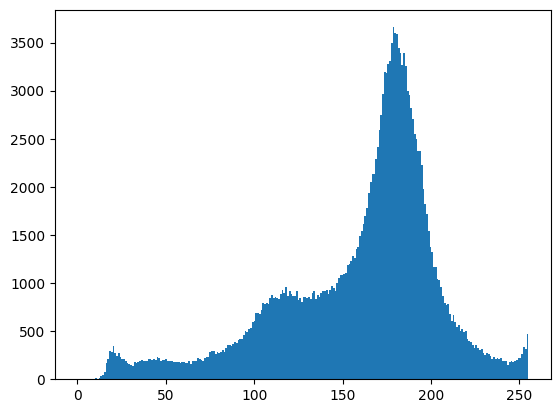

In [5]:
img = cv2.imread('01_Picture/01_cat.jpg',0) # 0 表示灰度图
print((img.ravel()).shape)
plt.hist(img.ravel(),256)
plt.show()

(256, 1)
(256, 1)
(256, 1)


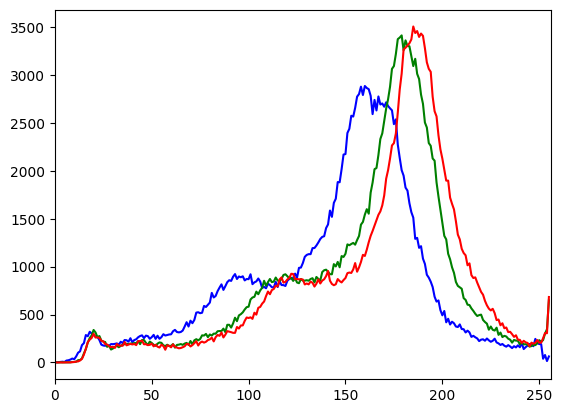

In [11]:
img = cv2.imread('01_Picture/01_cat.jpg')
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    print(histr.shape)
    plt.plot(histr,color=col)
    plt.xlim([0,256])

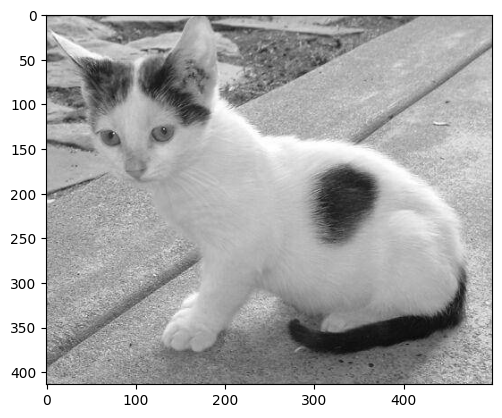

(414, 500)
(414, 500)


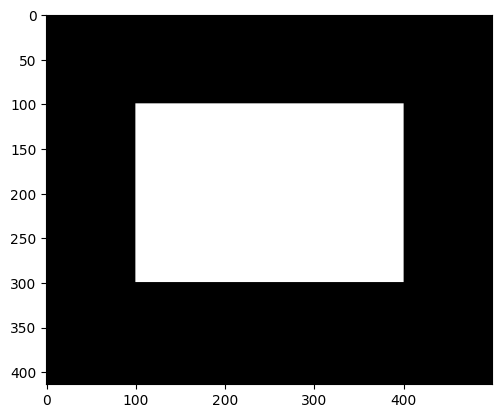

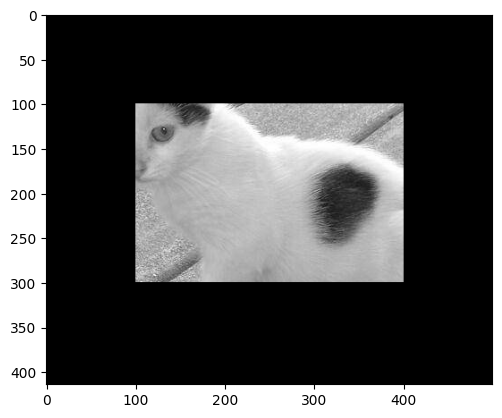

In [15]:
img = cv2.imread('01_Picture/01_cat.jpg',0)
cv_show(img)
print(img.shape[:2])
mask = np.zeros(img.shape[:2],np.uint8)
print(mask.shape)
mask[100:300,100:400] = 255
cv_show(mask)
masked_img = cv2.bitwise_and(img,img,mask=mask) # 与操作
cv_show(masked_img)


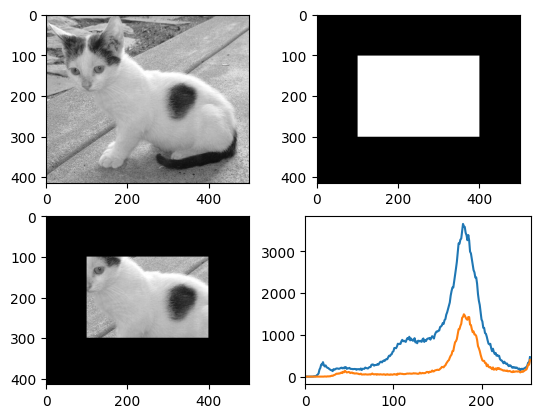

In [16]:
hist_full = cv2.calcHist([img], [0], None, [256], [0,256])
hist_mask = cv2.calcHist([img], [0], mask, [256], [0,256])
plt.subplot(221), plt.imshow(img,'gray')
plt.subplot(222), plt.imshow(mask,'gray')
plt.subplot(223), plt.imshow(masked_img,'gray')
plt.subplot(224), plt.plot(hist_full), plt.plot(hist_mask)
plt.xlim([0,256])
plt.show()

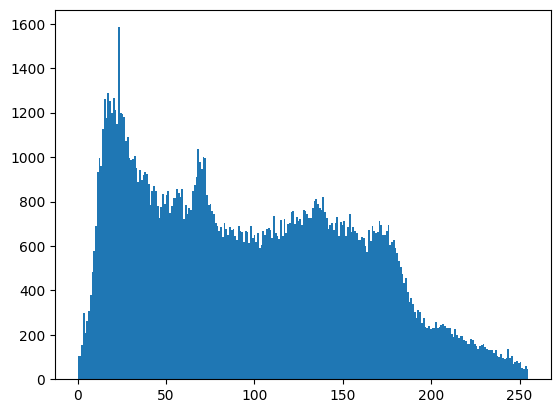

In [19]:
img = cv2.imread('01_Picture/16_Clahe.jpg',0)
plt.hist(img.ravel(), 256)
plt.show()

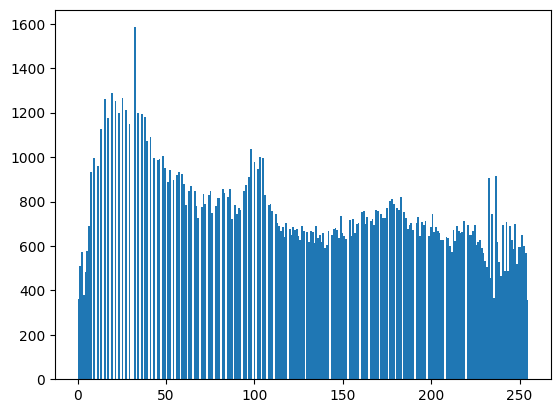

In [20]:
equ = cv2.equalizeHist(img)
plt.hist(equ.ravel(), 256)
plt.show()

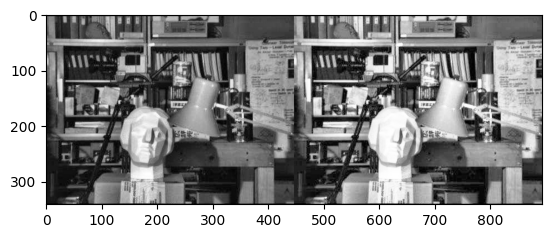

In [21]:
res = np.hstack((img, equ))
cv_show(res)

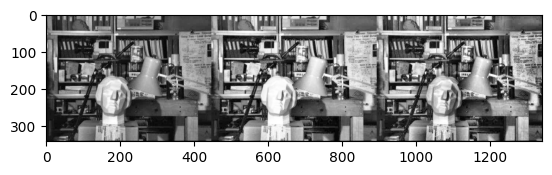

In [23]:
img = cv2.imread('01_Picture/16_Clahe.jpg',0)
clahe = cv2.createCLAHE(clipLimit=2.0,tileGridSize=(8,8)) # 自适应均衡化方法生成出来    
res_clahe = clahe.apply(img)
res = np.hstack((img,equ,res_clahe))
cv_show(res)